In [10]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
X_data = boston_df
y_target = boston.target

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

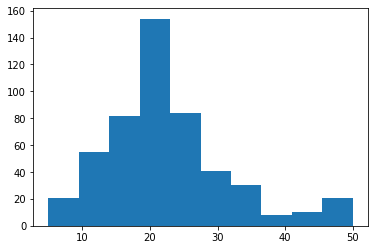

In [75]:
print(y_target.shape)
plt.hist(y_target, bins=10)

In [83]:
def regression(model_name, params = None, data=None, target=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('######', model_name, '######')
  for param in params:
    if model_name == 'Lasso' : model = Lasso(alpha=param)
    elif model_name == 'Ridge' : model = Ridge(alpha=param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
    n_mse = cross_val_score(model, data, target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*n_mse))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))

    model.fit(X_data, y_target)
    coeff = pd.Series(data = model.coef_, index = X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [80]:
def scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
  
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [84]:
alphas = [0.1, 1, 10, 100]
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods :
  X_data_scaled = scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=data)
  print('\n## 변환유형 : {0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  regression('Ridge', params=alphas, data=X_data_scaled, target=y_target, verbose=False)


## 변환유형 : None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환유형 : Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환유형 : Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환유형 : MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환유형 : MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환유형 : Log, Polynomial Degree:None
alpha 0.1일